<a href="https://colab.research.google.com/github/bblgm25/dsc-course0-m8-lab/blob/main/Lab_6_Scenario_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Scenario 2: Website Analytics Debug

#Your Prompt

Using Python with pandas and matplotlib, debug and analyze website engagement metrics based on the following DataFrame columns:
session_id
device_type
page_views
duration

Tasks:
1. Fix calculation errors for bounce rate, average session time, and pages per session.
2. Add data validation to remove invalid values (e.g., negative session durations).
3. Implement correct session time calculations.
4. Create visualizations (e.g., bar charts) summarizing engagement metrics by device type.
5. Include comments explaining each step in the code.

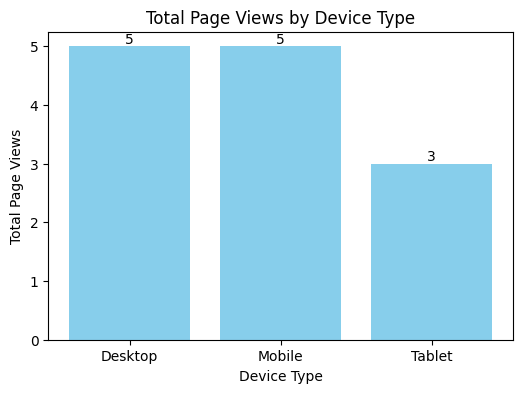

Overall Metrics:
 {'bounce_rate': np.float64(20.0), 'avg_session_time': np.float64(43.0), 'pages_per_session': np.float64(2.6)}

Device Metrics:
              session_count   duration  page_views
device_type                                      
Desktop                  2  35.000000           5
Mobile                   2  28.333333           5
Tablet                   1  60.000000           3


In [4]:
#Generated code

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Function to debug and analyze website engagement metrics
def analyze_user_engagement(logs_df):
    """
    Analyze website engagement metrics:
    - Fix bounce rate, average session time, and pages per session calculations.
    - Validate data to remove invalid values.
    - Summarize metrics by device type with visualizations.
    """

    # 1. Data Validation: Remove invalid values
    logs_df = logs_df[(logs_df['duration'] >= 0) & (logs_df['page_views'] >= 0)]

    # 2. Bounce Rate
    session_page_views = logs_df.groupby('session_id')['page_views'].sum()
    bounce_rate = (session_page_views == 1).mean() * 100

    # 3. Average Session Time (per session)
    avg_session_time = logs_df.groupby('session_id')['duration'].sum().mean()

    # 4. Pages Per Session
    pages_per_session = session_page_views.mean()

    metrics = {
        'bounce_rate': round(bounce_rate, 2),
        'avg_session_time': round(avg_session_time, 2),
        'pages_per_session': round(pages_per_session, 2)
    }

    # 5. Device Metrics
    device_metrics = logs_df.groupby('device_type').agg({
        'session_id': 'nunique',
        'duration': 'mean',
        'page_views': 'sum'
    }).rename(columns={'session_id': 'session_count'})

    # 6. Visualization
    plt.figure(figsize=(6, 4))
    bars = plt.bar(device_metrics.index, device_metrics['page_views'], color='skyblue')
    plt.title('Total Page Views by Device Type')
    plt.xlabel('Device Type')
    plt.ylabel('Total Page Views')

    # Add numeric labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.0f}', ha='center', va='bottom')

    plt.show()

    return metrics, device_metrics


# --- Example DataFrame and Function Call ---
logs_df = pd.DataFrame({
    'session_id': [1, 1, 2, 3, 4, 5],
    'device_type': ['Mobile', 'Mobile', 'Desktop', 'Tablet', 'Mobile', 'Desktop'],
    'page_views': [1, 2, 1, 3, 2, 4],
    'duration': [30, 40, 20, 60, 15, 50]
})

# Call the function and show results
metrics, device_metrics = analyze_user_engagement(logs_df)

print("Overall Metrics:\n", metrics)
print("\nDevice Metrics:\n", device_metrics)


## Follow-up Prompts

*  Add chart of sessions by device type (desktop, mobile, tablet)
*   Add bar chart for average aession auration by device type

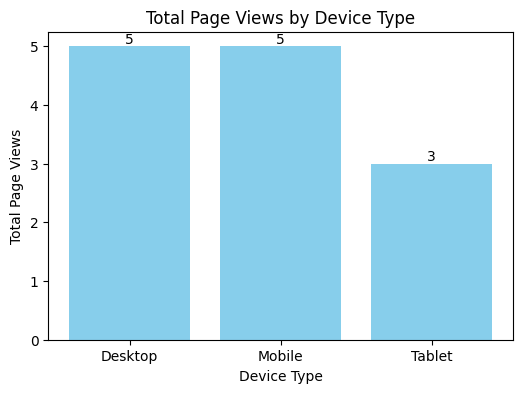

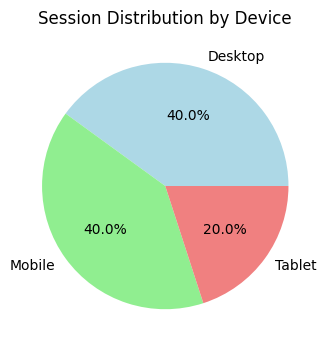

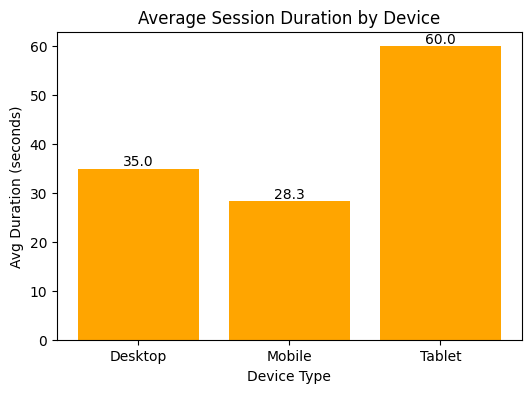

Overall Metrics:
 {'bounce_rate': np.float64(20.0), 'avg_session_time': np.float64(43.0), 'pages_per_session': np.float64(2.6)}

Device Metrics:
              session_count   duration  page_views
device_type                                      
Desktop                  2  35.000000           5
Mobile                   2  28.333333           5
Tablet                   1  60.000000           3


In [6]:
#Final Solution

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def analyze_user_engagement(logs_df):
    # Data Validation
    logs_df = logs_df[(logs_df['duration'] >= 0) & (logs_df['page_views'] >= 0)]

    # Bounce Rate
    session_page_views = logs_df.groupby('session_id')['page_views'].sum()
    bounce_rate = (session_page_views == 1).mean() * 100

    # Average Session Time
    avg_session_time = logs_df.groupby('session_id')['duration'].sum().mean()

    # Pages per Session
    pages_per_session = session_page_views.mean()

    metrics = {
        'bounce_rate': round(bounce_rate, 2),
        'avg_session_time': round(avg_session_time, 2),
        'pages_per_session': round(pages_per_session, 2)
    }

    # Device Metrics
    device_metrics = logs_df.groupby('device_type').agg({
        'session_id': 'nunique',
        'duration': 'mean',
        'page_views': 'sum'
    }).rename(columns={'session_id': 'session_count'})

    # ---- Visualization 1: Total Page Views by Device ----
    plt.figure(figsize=(6, 4))
    bars = plt.bar(device_metrics.index, device_metrics['page_views'], color='skyblue')
    plt.title('Total Page Views by Device Type')
    plt.xlabel('Device Type')
    plt.ylabel('Total Page Views')
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                 f'{bar.get_height():.0f}', ha='center', va='bottom')
    plt.show()

    # ---- Visualization 2: Session Distribution by Device ----
    plt.figure(figsize=(6, 4))
    plt.pie(device_metrics['session_count'], labels=device_metrics.index,
            autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
    plt.title('Session Distribution by Device')
    plt.show()

    # ---- Visualization 3: Avg Session Duration by Device ----
    plt.figure(figsize=(6, 4))
    bars = plt.bar(device_metrics.index, device_metrics['duration'], color='orange')
    plt.title('Average Session Duration by Device')
    plt.xlabel('Device Type')
    plt.ylabel('Avg Duration (seconds)')
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                 f'{bar.get_height():.1f}', ha='center', va='bottom')
    plt.show()

    return metrics, device_metrics


# Example dataset
logs_df = pd.DataFrame({
    'session_id': [1, 1, 2, 3, 4, 5],
    'device_type': ['Mobile', 'Mobile', 'Desktop', 'Tablet', 'Mobile', 'Desktop'],
    'page_views': [1, 2, 1, 3, 2, 4],
    'duration': [30, 40, 20, 60, 15, 50]
})

metrics, device_metrics = analyze_user_engagement(logs_df)
print("Overall Metrics:\n", metrics)
print("\nDevice Metrics:\n", device_metrics)

# Scenario Questions

1.   Different prompts approached error identification by reviewing each metric calculation step-by-step, often using small sample datasets to uncover logical issues. This helped identify problems like bounce rates exceeding 100% or incorrect average session time formulas.
2.   For validation, the suggestions included removing negative or invalid values for duration and page views, checking that groupings by session were accurate, and confirming that session counts and page views matched realistic engagement patterns.

3. Time handling was improved by summing durations within each session and then averaging them, ensuring the average session time reflects actual user behavior rather than total raw values.

